# Basic Tutorial for <font color='green'> Toad</font>


Toad is developed to facilitate the model development of credit risk scorecard particularly. In this tutorial, the basic use of toad will be introduced. 

______
______

The tutorial will follow the common procedure of credit risk scorecard model development: 



**(1) EDA**

**(2) Feature selection and WOE binning**

**(3) Model selection**

**(4) Model validation**

**(5) Scorecard transformation**

### 0. Data preparation
The data used is the famous german credit dataset. The following data preprocessing include: 

(1) replacing target as 0, 1 from 'good' / 'bad';

(2) train test split; 

and (3) adding a feature to indicate train and test. The training set will be used for modelling and the test set will only be used for validation

In [1]:
'''
! Make sure to upgrade to the latest version !
'''
#!pip install --upgrade toad

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import toad

In [2]:
data = pd.read_csv('germancredit.csv')
data.replace({'good':0,'bad':1},inplace=True) # replace target as 0, 1. 

print(data.shape) # 1000 data and 20 features 
data.head()

(1000, 21)


,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : divorced/separated,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


In [3]:
Xtr,Xts,Ytr,Yts = train_test_split(data.drop('creditability',axis=1),data['creditability'],test_size=0.25,random_state=450)
data_tr = pd.concat([Xtr,Ytr],axis=1)
data_tr['type'] = 'train' # A new feature to indicate test/training sample
data_ts = pd.concat([Xts,Yts],axis=1)
data_ts['type'] = 'test'

# The training set will be used for modelling and the test set will only be used for validation. 

print(data_tr.shape)
#print(data_tr.head())

(750, 22)


___
----
### I. EDA data handling
Toad supports general EDA of each feature to detect missing values and feature distribution.

1. **toad.detector.detect()**: return the EDA report of each feature, incl. data type, distribution, missing rate, and unique values. The EDA report is aimed to guide missing / extreme value detection & replacing.

In [4]:
toad.detector.detect(data_tr).head(10)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
status.of.existing.checking.account,object,750,0.00%,4,no checking account:39.20%,... < 0 DM:27.60%,0 <= ... < 200 DM:27.07%,... >= 200 DM / salary assignments for at leas...,None,None,no checking account:39.20%,... < 0 DM:27.60%,0 <= ... < 200 DM:27.07%,... >= 200 DM / salary assignments for at leas...
duration.in.month,int64,750,0.00%,32,20.548,11.941,4,6,8,18,24,36,60,72
credit.history,object,750,0.00%,5,existing credits paid back duly till now:53.73%,critical account/ other credits existing (not ...,delay in paying off in the past:8.00%,all credits at this bank paid back duly:4.93%,no credits taken/ all credits paid back duly:3...,existing credits paid back duly till now:53.73%,critical account/ other credits existing (not ...,delay in paying off in the past:8.00%,all credits at this bank paid back duly:4.93%,no credits taken/ all credits paid back duly:3...
purpose,object,750,0.00%,10,radio/television:27.47%,car (new):25.33%,furniture/equipment:18.40%,business:9.33%,car (used):9.20%,education:5.07%,repairs:2.67%,domestic appliances:1.07%,others:0.93%,retraining:0.53%
credit.amount,int64,750,0.00%,700,3207.35,2731.93,250,417.33,906.3,2301.5,3956.5,7179.4,12715.2,15672
savings.account.and.bonds,object,750,0.00%,5,... < 100 DM:60.93%,unknown/ no savings account:17.47%,100 <= ... < 500 DM:10.53%,500 <= ... < 1000 DM:6.00%,... >= 1000 DM:5.07%,... < 100 DM:60.93%,unknown/ no savings account:17.47%,100 <= ... < 500 DM:10.53%,500 <= ... < 1000 DM:6.00%,... >= 1000 DM:5.07%
present.employment.since,object,750,0.00%,5,1 <= ... < 4 years:32.53%,... >= 7 years:24.93%,... < 1 year:18.67%,4 <= ... < 7 years:17.60%,unemployed:6.27%,1 <= ... < 4 years:32.53%,... >= 7 years:24.93%,... < 1 year:18.67%,4 <= ... < 7 years:17.60%,unemployed:6.27%
installment.rate.in.percentage.of.disposable.income,int64,750,0.00%,4,2.94533,1.13493,1,1,1,3,4,4,4,4
personal.status.and.sex,object,750,0.00%,4,male : single:53.60%,female : divorced/separated/married:32.27%,male : married/widowed:9.07%,male : divorced/separated:5.07%,None,None,male : single:53.60%,female : divorced/separated/married:32.27%,male : married/widowed:9.07%,male : divorced/separated:5.07%
other.debtors.or.guarantors,object,750,0.00%,3,none:90.80%,guarantor:4.93%,co-applicant:4.27%,None,None,None,None,none:90.80%,guarantor:4.93%,co-applicant:4.27%


---
---
### II. Feature selection, fine classing, and WOE transformation

Toad can be used to filter abundant features such as the ones with high missing rate, low iv, and highly correlated features. It can also fine class features with vairous binning techniques and apply WOE transformation.

----
1. **toad.selection.select()**:  used to filter features based on missing percentage, iv (with 20 bins), and multicolleanrity (with VIF and/or intercorrelation) 

In [7]:
# The filter criteria include missing rate >=0.5, iv <= 0.05, correlation >= 0.7 (the one with the hightest iv will be kept), 
# and "exclude = ['type']" specifies that 'type' tag will be not dropped
selected_data, drop_lst= toad.selection.select(data_tr,target = 'creditability', empty = 0.5, iv = 0.05, corr = 0.7, return_drop=True, exclude=['type'])

selected_test = data_ts[selected_data.columns]

print(selected_data.shape)
drop_lst # As shown, 8 features have been dropped due to low iv. 

(750, 15)


{'empty': array([], dtype=float64),
 'iv': array(['installment.rate.in.percentage.of.disposable.income',
        'personal.status.and.sex', 'present.residence.since',
        'number.of.existing.credits.at.this.bank', 'job',
        'number.of.people.being.liable.to.provide.maintenance.for',
        'telephone'], dtype=object),
 'corr': array([], dtype=object)}

-------
2. **toad.quality(dataframe, target)**: return the quality of each feature, incl. iv, gini, and entropy. The output provides information of which features are potentially more useful. 

In [8]:
quality = toad.quality(data,'creditability')
quality.head(6)

,iv,gini,entropy,unique
status.of.existing.checking.account,0.666012,0.368037,0.545196,4.0
duration.in.month,0.354784,0.406755,0.609659,33.0
credit.amount,0.351455,0.408680,0.610864,921.0
credit.history,0.293234,0.394090,0.580631,5.0
age.in.years,0.211197,0.414339,0.610863,53.0
savings.account.and.bonds,0.196010,0.404838,0.591377,5.0


__________
---
First, Combiner() to bin and set bins

3. **toad.transform.Combiner()**: combiner is used to fine class numerical and categorical features with binning. We support Chi-squared binning, decision tree binning, binning by step, and binning by quantile. _The following demonstrates the procedure._

3.1. **combiner().fit(**data, y = 'target', method = 'chi', min_samples = None, n_bins = None** )**: fit binning. Method supports 'chi', 'dt', 'percentile', and 'step'.

3.2. **combiner().set_rules(**dict**)**: used to set bins.

3.3. **combiner().transform(**data**)**: transform the features of data into binned groups. 
____
Second, WOETransformer() to WOE transform

4. **toad.transform.WOETransformer()**: apply WOE transformation after binnning

4.1 **WOETransformer().fit_transform(**data, y_true, exclude = None**)**: WOE transform data by data. "exclude" excludes the columns not to be transformed 

4.2 **WOETransformer().transform(**data**)**: transform data after fit_transform. Normally applied to test/validation data after fit_transform(training).

-----
Use plots to tune bins. 

5. **toad.plot.badrate_plot(**data,target = 'target', x = None, by = None**)**: plot the bad rate of each bin across different sets. Different sets can be train/test, or different month etc. "by" is name of the column to plot. "x" is the column used for comparison (e.g.month, test/train).
6. **toad.plot.proportion_plot(**data[col]**)**: plot the proportion each bin of a binned feature.

Note: the guide below is the binning as a whole, please refer to the [complete tutorial](complete tutorial.html) for bins adjustment. (TBA)

In [9]:
# Step 1: initialise a combiner class
combiner = toad.transform.Combiner()

# Step 2: fit data and specify binningm method along with other parameters (optional)
combiner.fit(selected_data,y='creditability',method='chi',min_samples =  0.05,exclude='type') # fit binning 

# Step 3: save bins. The bins are saved as a dictionary. 
bins = combiner.export() 

# check bins by features 
print('status.of.existing.checking.account:',bins['status.of.existing.checking.account'])
print('credit.amount:',bins['credit.amount'])
print('duration.in.month:', bins['duration.in.month'])

status.of.existing.checking.account: [['no checking account'], ['... >= 200 DM / salary assignments for at least 1 year'], ['0 <= ... < 200 DM'], ['... < 0 DM']]
credit.amount: [2145, 3914]
duration.in.month: [9, 12, 18, 33]


In [10]:
bins

{'status.of.existing.checking.account': [['no checking account'],
  ['... >= 200 DM / salary assignments for at least 1 year'],
  ['0 <= ... < 200 DM'],
  ['... < 0 DM']],
 'duration.in.month': [9, 12, 18, 33],
 'credit.history': [['critical account/ other credits existing (not at this bank)'],
  ['existing credits paid back duly till now'],
  ['delay in paying off in the past'],
  ['all credits at this bank paid back duly',
   'no credits taken/ all credits paid back duly']],
 'purpose': [['domestic appliances', 'car (used)', 'retraining'],
  ['radio/television'],
  ['furniture/equipment'],
  ['repairs', 'business', 'car (new)'],
  ['education', 'others']],
 'credit.amount': [2145, 3914],
 'savings.account.and.bonds': [['unknown/ no savings account'],
  ['... >= 1000 DM'],
  ['500 <= ... < 1000 DM'],
  ['... < 100 DM'],
  ['100 <= ... < 500 DM']],
 'present.employment.since': [['4 <= ... < 7 years'],
  ['... >= 7 years'],
  ['1 <= ... < 4 years'],
  ['... < 1 year'],
  ['unemployed']]

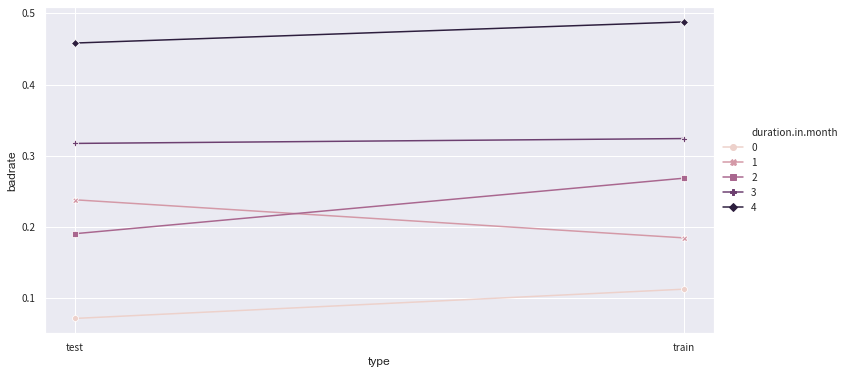

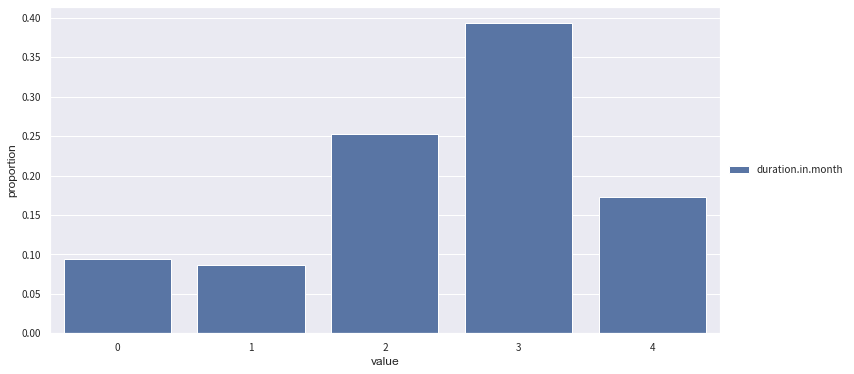

In [12]:
# Step 4: adjust bins with badrate_plot(). To fine tune the bins, we use a new combiner().

# we want to check the bins of 'duration.in.month'
adj_bin = {'duration.in.month': [9, 12, 18, 33]}

c2 = toad.transform.Combiner()
c2.set_rules(adj_bin)

data_ = pd.concat([data_tr,data_ts],axis = 0)
temp_data = c2.transform(data_[['duration.in.month','creditability','type']])

# plot shows stability across train and test
from toad.plot import badrate_plot, proportion_plot
badrate_plot(temp_data, target = 'creditability', x = 'type', by = 'duration.in.month') 
proportion_plot(temp_data['duration.in.month'])

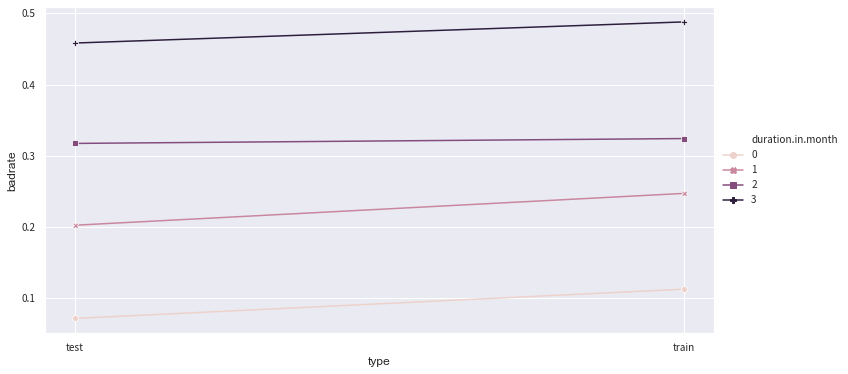

In [13]:
# Assume we want to combine bin #1 and #2...
adj_bin = {'duration.in.month': [9, 18,33]}
c2.set_rules(adj_bin)

temp_data = c2.transform(data_[['duration.in.month','creditability','type']])
badrate_plot(temp_data, target = 'creditability', x = 'type', by = 'duration.in.month')

adj_bin = {'duration.in.month': [9, 18,33],'foreign.worker': [['no'], ['yes']]}
# therefore use this 

In [14]:
# Step 5: WOE transform with adjusted bins 
combiner.set_rules(adj_bin)

binned_data = combiner.transform(selected_data)

transer = toad.transform.WOETransformer()
data_tr_woe = transer.fit_transform(binned_data, binned_data['creditability'], exclude=['creditability','type'])
data_ts_woe = transer.transform(combiner.transform(selected_test))

In [15]:
binned_data.head(3) # the values are transformed into "index + bin" format

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,other.debtors.or.guarantors,property,age.in.years,other.installment.plans,housing,foreign.worker,creditability,type
569,3,3,1,1,2,3,2,0,2,2,0,0,1,1,train
574,2,1,1,1,0,3,1,0,2,1,0,0,1,0,train
993,3,3,1,2,2,3,4,0,1,2,0,0,1,0,train


In [18]:
data_tr_woe.head(5)

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,other.debtors.or.guarantors,property,age.in.years,other.installment.plans,housing,foreign.worker,creditability,type
569,0.786313,0.786622,0.046896,-0.384125,0.552992,0.244802,0.002898,0.0,0.141484,0.202109,-0.157497,-0.174441,0.043742,1,train
574,0.363027,-0.279729,0.046896,-0.384125,-0.207469,0.244802,-0.173326,0.0,0.141484,-0.246281,-0.157497,-0.174441,0.043742,0,train
993,0.786313,0.786622,0.046896,0.141484,0.552992,0.244802,0.534527,0.0,0.054473,0.202109,-0.157497,-0.174441,0.043742,0,train
355,0.363027,0.099812,0.046896,0.262366,-0.207469,0.244802,0.399313,0.0,-0.598183,0.546949,0.605057,-0.174441,0.043742,1,train
508,-1.072960,0.099812,0.046896,-0.384125,-0.207469,0.244802,0.002898,0.0,0.054473,0.202109,-0.157497,-0.174441,0.043742,0,train


-----------
---
### III. Model selection
1. **toad.selection.stepwise()**: this function performs feature selection (or model selection formally) with forward / backward / both-way stepwise. The function uses AIC / BIC / KS / AUC as selection criterion. 
2. The function supports choosing base algorithm (estimator) like 'ols': LinearRegression / 'lr': LogisticRegression / 'lasso': Lasso / 'ridge': Ridge and so on. （toad version >= 0.0.58）

In [19]:
final_data = toad.selection.stepwise(data_tr_woe.drop('type',axis=1),target = 'creditability',direction = 'both', criterion = 'aic')

final_test = data_ts_woe[final_data.columns]
print(final_data.shape)
print(final_data.columns) # As shown, 15 features are down to 8 after both-way stepwise 

(750, 8)
Index(['status.of.existing.checking.account', 'duration.in.month',
       'credit.history', 'purpose', 'property', 'age.in.years',
       'other.installment.plans', 'creditability'],
      dtype='object')


In [21]:
# Now ready to model. Fit a lr. 
Xtr = final_data.drop('creditability',axis=1)
Ytr = final_data['creditability']
Xts = final_test.drop('creditability',axis=1)
Yts = final_test['creditability']

lr = LogisticRegression()
lr.fit(Xtr, Ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

----
----
### IV. Model evaluation and validation
1. **Common evaluation metrics**: toad. metrics. KS, F1, AUC

In [22]:
from toad.metrics import KS, F1, AUC

EYtr_proba = lr.predict_proba(Xtr)[:,1]
EYtr = lr.predict(Xtr)

print('Training error')
print('F1:', F1(EYtr_proba,Ytr))
print('KS:', KS(EYtr_proba,Ytr))
print('AUC:', AUC(EYtr_proba,Ytr))

EYts_proba = lr.predict_proba(Xts)[:,1]
EYts = lr.predict(Xts)

print('\nTest error')
print('F1:', F1(EYts_proba,Yts))
print('KS:', KS(EYts_proba,Yts))
print('AUC:', AUC(EYts_proba,Yts))

Training error
F1: 0.4572605561277034
KS: 0.47590569486443
AUC: 0.8080204850026532

Test error
F1: 0.4465408805031446
KS: 0.4497329928024147
AUC: 0.7795449268632458


------
2. **toad.metrics.PSI():** return the PSI of each feature to detect data migration

In [23]:
psi = toad.metrics.PSI(final_data,final_test)
psi.sort_values(0,ascending=False) # Further tune the unstable feature if any 

purpose                                0.053175
duration.in.month                      0.038424
age.in.years                           0.017464
property                               0.014331
credit.history                         0.012744
status.of.existing.checking.account    0.001251
creditability                          0.000545
other.installment.plans                0.000047
dtype: float64

----
3. **toad.metrics.KS_bucket(**predicted_proba, y_true, bucket=10, method = 'quantile'**)**: output the result table including bad_rate, KS etc. 

In [19]:
tr_bucket = toad.metrics.KS_bucket(EYtr_proba,Ytr,bucket=10,method='quantile')
tr_bucket

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,cum_bads,cum_goods,cum_bads_prop,cum_goods_prop,ks
0,0.012857,0.052979,0,75,75,0.000000,1.000000,0.000000,0.000000,0.143403,0,75,0.000000,0.143403,-0.143403
1,0.053378,0.094267,1,74,75,0.013333,0.986667,0.013514,0.004405,0.141491,1,149,0.004405,0.284895,-0.280490
2,0.094706,0.129116,9,66,75,0.120000,0.880000,0.136364,0.039648,0.126195,10,215,0.044053,0.411090,-0.367037
3,0.130818,0.173092,14,61,75,0.186667,0.813333,0.229508,0.061674,0.116635,24,276,0.105727,0.527725,-0.421998
4,0.173933,0.241864,20,55,75,0.266667,0.733333,0.363636,0.088106,0.105163,44,331,0.193833,0.632887,-0.439055
5,0.242644,0.324243,18,57,75,0.240000,0.760000,0.315789,0.079295,0.108987,62,388,0.273128,0.741874,-0.468746
6,0.324983,0.422900,29,46,75,0.386667,0.613333,0.630435,0.127753,0.087954,91,434,0.400881,0.829828,-0.428947
7,0.424597,0.529979,37,38,75,0.493333,0.506667,0.973684,0.162996,0.072658,128,472,0.563877,0.902486,-0.338609
8,0.532320,0.649534,45,30,75,0.600000,0.400000,1.500000,0.198238,0.057361,173,502,0.762115,0.959847,-0.197732
9,0.652615,0.921777,54,21,75,0.720000,0.280000,2.571429,0.237885,0.040153,227,523,1.000000,1.000000,0.000000


----
----
### V. Scorecard transformation
Toad allows scorecard transformation from bins and convert probability of credit risk into scores accordingly.
1. toad.scorecard.ScoreCard():

1.1 ScoreCard().predict(X): output scores with original features. The function uses combiner and transer to bin the original feature to predict the risk scores.

In [26]:
# Step 1: send combiner, transer, and LR parameters to scorecard (toad version >= 0.0.58)
card = toad.scorecard.ScoreCard(combiner = combiner, transer = transer , C = 0.1) 
card.fit(Xtr, Ytr)
card.export(to_frame = True,).head(10) # output the scorecard details

,name,value,score
0,status.of.existing.checking.account,no checking account,146.08
1,status.of.existing.checking.account,... >= 200 DM / salary assignments for at leas...,103.40
2,status.of.existing.checking.account,0 <= ... < 200 DM,48.28
3,status.of.existing.checking.account,... < 0 DM,19.46
4,duration.in.month,[-inf ~ 9),146.86
5,duration.in.month,[9 ~ 18),89.79
6,duration.in.month,[18 ~ 33),67.02
7,duration.in.month,[33 ~ inf),25.81
8,credit.history,critical account/ other credits existing (not ...,101.38
9,credit.history,existing credits paid back duly till now,70.84


In [27]:
# Step 2: predict scores
pred_scores = card.predict(data_ts)
print('Sample scores:',pred_scores[:10])
print('Test KS: ',KS(pred_scores, data_ts['creditability']))

Sample scores: [619.96882172 324.61412509 632.85991117 492.45067183 507.61111214
 628.42761504 596.73095    530.99526836 562.08844561 560.0114055 ]
Test KS:  0.46598560482934753
